In [1]:
%matplotlib inline

# Pré processamento de relatórios radiológicos


In [2]:
import pandas as pd
import re
df = pd.read_csv('UnifespRadReport-1A.csv', encoding="utf-8")
print(df.head(10))

                                              report     label
0  TÉCNICA: CORTES DO CRÂNIO COM TÉCNICA VOLUMÉTR...  positive
1  EXAME DE TOMOGRAFIA COMPUTADORIZADA DE CRÂNIO\...  positive
2  TOMOGRAFIA COMPUTADORIZADA DE ABDOME E PELVE\n...  positive
3  TÉCNICA: CORTES DO CRÂNIO COM\nTÉCNICA VOLUMÉT...  positive
4  EXAME DE TOMOGRAFIA COMPUTADORIZADA DE CRÂNIO\...  positive
5  TOMOGRAFIA COMPUTADORIZADA DO CRÂNIO\n\nTÉCNIC...  positive
6  TÉCNICA:\n\nREALIZADA AQUISIÇÃO VOLUMÉTRICA EM...  positive
7  TOMOGRAFIA COMPUTADORIZADA DO CRÂNIO\n\nTÉCNIC...  positive
8  TÉCNICA:\n\nREALIZADA A AQUISIÇÃO VOLUMÉTRICA ...  positive
9  TOMOGRAFIA COMPUTADORIZADA DE CRANIO\n\nTÉCNIC...  positive


In [3]:
print(df['report'][4])

EXAME DE TOMOGRAFIA COMPUTADORIZADA DE CRÂNIO
TÉCNICA:
CORTES DO CRÂNIO COM TÉCNICA VOLUMÉTRICA, E RECONSTRUÇÕES NO PLANO AXIAL PARALELO À LINHA ORBITOMEATAL.
DESCRIÇÃO:
CALOTA CRANIANA COM CRANIOTOMIA FRONTAL DIREITA
ESPAÇO PERIENCEFÁLICO FRONTAL BILATERALMENTE ALARGADO, COM PRESENÇA DE GÁS. E CISTERNAS CONSERVADAS. PRESENÇA DE CLIPE METÁLICO DE ANEURISMA NA REGIÃO PARASSELAR DIREITA.
VENTRÍ­CULOS LATERAIS ASSIMÉTRICOS, COM COMPRESÃO E DEFORMAÇÃO DO CORNO FRONTAL DIREITA. TERCEIRO E QUARTO VENTRÍ­CULOS DE ASPECTO NORMAL.
PARÊNQUIMA CEREBELAR E DO TRONCO CEREBRAL DE ASPECTO NORMAL.
PARÊNQUIMA CEREBRAL COM ÁREA HIPOATENUANTE SUBCORTICAL SUBFRONTAL DIREITA, QUE SE ASSOCIA A DISCRETO EFEITO EXPANSIVO. SULCOS CEREBRAIS NORMAIS.
CONCLUSÃO:
CONTROLE DO TRATAMENTO CIRÚRGICO PARA CLIPAGEM DE ANEURISMA DA REGIÃO PARASSELAR DIREITA. SINAIS DA MANIPULAÇÃO CIRÚRGICA RECENTE. ÁREA DE CONTUSÃO E GLIOSE SUBFRONTAL DIREITA.



In [4]:
df['report'][3]

'TÉCNICA: CORTES DO CRÂNIO COM\nTÉCNICA VOLUMÉTRICA, E RECONSTRUÇÕES NO PLANO AXIAL PARALELO À LINHA ORBITOMEATAL,ANTES E APÓS A INJEÇÃO ENDOVENOSA DO MEIO DE CONTRASTE IODADO.\n\nDESCRIÇÃO:\n\nEXAME REALIZADO EM ----------.\n\nLEVE AUMENTO VOLUMÉTRICO DAS PARTES MOLES COM DIMINUTAS BOLHAS DE ENFISEMA E DENSIFICAÇÕES DO SUBCUTÂNEO NA PAREDE LATERAL DA ÓRBITA E MAIS EVIDENTE NAS REGIÕES TÊMPOROPARIETAL À ESQUERDA.\n\nFRATURA NA REGIÃO TEMPORAL ESTENDENDO-SE À MASTOIDE À ESQUERDA COM VELAMENTO POR PROVÁVEL CONTEÚDO HEMÁTICO NAS CÉLULAS DA MASTOIDE\n\nCONTEÚDO DENSO (HEMOSINUS) NAS CAVIDADES PARANASAIS; DISCRETO NOS SEIOS FRONTAIS, COM VELAMENTO TOTAL DOS SEIOS ESFENOIDAIS, NÍ\xadVEIS LÍ\xadQUIDOS NOS SEIOS MAXILARES E BOLHAS GASOSAS NAS CÉLULAS ETMOIDAIS.\n\nDISCRETAS DESCONTINUIDADES ÓSSEAS NAS PAREDES DO SEIO MAXILAR ESQUERDO E DOS SEIOS ESFENOIDAIS.\n\nAPAGAMENTO DIFUSO DOS SULCOS, FISSURAS E CISTERNAS ENCEFÁLICAS.\n\nREDUÇÃO DAS DIMENSÕES DO SISTEMA VENTRICULAR SUPRATENTORIAL.\n\nCOL

### Converter a coluna texto para lowercase


In [5]:
df['report'] = df['report'].str.lower()

In [6]:
df['report'][3]

'técnica: cortes do crânio com\ntécnica volumétrica, e reconstruções no plano axial paralelo à linha orbitomeatal,antes e após a injeção endovenosa do meio de contraste iodado.\n\ndescrição:\n\nexame realizado em ----------.\n\nleve aumento volumétrico das partes moles com diminutas bolhas de enfisema e densificações do subcutâneo na parede lateral da órbita e mais evidente nas regiões têmporoparietal à esquerda.\n\nfratura na região temporal estendendo-se à mastoide à esquerda com velamento por provável conteúdo hemático nas células da mastoide\n\nconteúdo denso (hemosinus) nas cavidades paranasais; discreto nos seios frontais, com velamento total dos seios esfenoidais, ní\xadveis lí\xadquidos nos seios maxilares e bolhas gasosas nas células etmoidais.\n\ndiscretas descontinuidades ósseas nas paredes do seio maxilar esquerdo e dos seios esfenoidais.\n\napagamento difuso dos sulcos, fissuras e cisternas encefálicas.\n\nredução das dimensões do sistema ventricular supratentorial.\n\ncol

### Transformar para unidecode para remove accents


In [7]:
import unidecode
df['report'] = df.apply(lambda row: unidecode.unidecode(str(row['report'])), axis=1 )

In [8]:
df['report'][4]

'exame de tomografia computadorizada de cranio\ntecnica:\ncortes do cranio com tecnica volumetrica, e reconstrucoes no plano axial paralelo a linha orbitomeatal.\ndescricao:\ncalota craniana com craniotomia frontal direita\nespaco periencefalico frontal bilateralmente alargado, com presenca de gas. e cisternas conservadas. presenca de clipe metalico de aneurisma na regiao parasselar direita.\nventriculos laterais assimetricos, com compresao e deformacao do corno frontal direita. terceiro e quarto ventriculos de aspecto normal.\nparenquima cerebelar e do tronco cerebral de aspecto normal.\nparenquima cerebral com area hipoatenuante subcortical subfrontal direita, que se associa a discreto efeito expansivo. sulcos cerebrais normais.\nconclusao:\ncontrole do tratamento cirurgico para clipagem de aneurisma da regiao parasselar direita. sinais da manipulacao cirurgica recente. area de contusao e gliose subfrontal direita.\n'

##  O que é RegEx?
#### Uma expressão regular (Regex) é uma notação que serve para caracterizar um conjunto de strings. 
#### O campo do relatório ("report"), pode conter a descrição do exame, a conclusão, bem como a técnica do exame. As seguintes abordagens de regex destinam-se a extrair a descrição do exame, a conclusão e  técnica.
#### Ou seja EXTRAI a conclusão, técnica e descrição em  novas colunas.


In [9]:

p = re.compile("impressao\s+diagnostica+\s?:(.*)", re.DOTALL)
df["conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if p.search(str(row['report'])) else '', axis=1)
p = re.compile("impressao\s+\w+\s?:(.*)", re.DOTALL)
df["conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['conclusao']=='' and p.search(str(row['report']))) else row['conclusao'], axis=1)
p = re.compile("conclusao+\s?:(.*)", re.DOTALL)
df["conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['conclusao']=='' and p.search(str(row['report']))) else row['conclusao'], axis=1)
p = re.compile("impressao(.*)", re.DOTALL)
df["conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['conclusao']=='' and p.search(str(row['report']))) else row['conclusao'], axis=1)
p = re.compile("conclusao(.*)", re.DOTALL)
df["conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['conclusao']=='' and p.search(str(row['report']))) else row['conclusao'], axis=1)

print(len(df[(df['conclusao']!= '')]))

30


In [10]:
df['conclusao'][4]

'\ncontrole do tratamento cirurgico para clipagem de aneurisma da regiao parasselar direita. sinais da manipulacao cirurgica recente. area de contusao e gliose subfrontal direita.\n'

In [11]:
p = re.compile("(.*)impressao\s+diagnostica+\s?:", re.DOTALL)
df["relatorio_sem_conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if p.search(str(row['report'])) else '', axis=1)
p = re.compile("(.*)impressao\s+\w+\s?:(.*)", re.DOTALL)
df["relatorio_sem_conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['relatorio_sem_conclusao']=='' and p.search(str(row['report']))) else row['relatorio_sem_conclusao'], axis=1)
p = re.compile("(.*)conclusao+\s?", re.DOTALL)
df["relatorio_sem_conclusao"] = df.apply(lambda row: p.search(str(row['report'])).group(1) if (row['relatorio_sem_conclusao']=='' and p.search(str(row['report']))) else row['report'], axis=1)


In [12]:
p = re.compile("descricao?:(.*)", re.DOTALL)
df["descricao"] = df.apply(lambda row: p.search(str(row['relatorio_sem_conclusao'])).group(1) if p.search(str(row['relatorio_sem_conclusao'])) else '', axis=1)
p = re.compile("analise\s+\w+\s?:(.*)", re.DOTALL)
df["descricao"] = df.apply(lambda row: p.search(str(row['relatorio_sem_conclusao'])).group(1) if (row['descricao']=='' and p.search(str(row['relatorio_sem_conclusao']))) else row['descricao'], axis=1)
p = re.compile("descricao(.*)", re.DOTALL)
df["descricao"] = df.apply(lambda row: p.search(str(row['relatorio_sem_conclusao'])).group(1) if (row['descricao']=='' and p.search(str(row['relatorio_sem_conclusao']))) else row['descricao'], axis=1)
p = re.compile("analise(.*)", re.DOTALL)
df["descricao"] = df.apply(lambda row: p.search(str(row['relatorio_sem_conclusao'])).group(1) if (row['descricao']=='' and p.search(str(row['relatorio_sem_conclusao']))) else row['descricao'], axis=1)


In [13]:
df['descricao'][4]

'\ncalota craniana com craniotomia frontal direita\nespaco periencefalico frontal bilateralmente alargado, com presenca de gas. e cisternas conservadas. presenca de clipe metalico de aneurisma na regiao parasselar direita.\nventriculos laterais assimetricos, com compresao e deformacao do corno frontal direita. terceiro e quarto ventriculos de aspecto normal.\nparenquima cerebelar e do tronco cerebral de aspecto normal.\nparenquima cerebral com area hipoatenuante subcortical subfrontal direita, que se associa a discreto efeito expansivo. sulcos cerebrais normais.\n'

In [14]:
df.to_csv("report_sentences_selected.csv")

#### Aplicar pipeline de pré-processador comum: normalização, stemização, tokenização, stopword e lematização


O processo de normalização trata de colocar todas as palavras em caixa baixa, retirando os acentos ou cedilha. Isto faz com que os algoritmos de análise não tratem palavras iguais como sendo diferentes apenas por apresentarem a letra inicial como maiúscula, ou um erro de acentuação, por exemplo.

A lematização é o processo, efetivamente, de deflexionar uma palavra para determinar o seu lema (as flexões chamam-se lexemas).

A stemização (do inglês, stemming) é o processo de reduzir palavras flexionadas (ou às vezes derivadas) ao seu tronco (stem), base ou raiz, geralmente uma forma da palavra escrita.

Stop words são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine. Exemplos: as, e, os, de, para, com, sem, foi.

A tokenização, também conhecida como segmentação de palavras, quebra a sequência de caracteres em um texto localizando o limite de cada palavra, ou seja, os pontos onde uma palavra termina e outra começa.

In [15]:
#Remova os caracteres de pontuação, exceto '.' como isso define frases
df['descricao_clean'] = df.apply(lambda row: re.sub(r"[^a-zA-Z0-9\\.]", " ", row['descricao']), axis=1 )
df['descricao_clean'] = df.apply(lambda row: row['descricao_clean'].replace('.', ' . '), axis=1)
df['descricao_clean'] = df.apply(lambda row: re.sub('(.*?)\\.\s*(.*)', r'\1 . \2', row['descricao_clean']), axis=1 )

In [16]:
df['descricao_clean'][4]

' calota craniana com craniotomia frontal direita espaco periencefalico frontal bilateralmente alargado  com presenca de gas  . e cisternas conservadas .  presenca de clipe metalico de aneurisma na regiao parasselar direita .  ventriculos laterais assimetricos  com compresao e deformacao do corno frontal direita .  terceiro e quarto ventriculos de aspecto normal .  parenquima cerebelar e do tronco cerebral de aspecto normal .  parenquima cerebral com area hipoatenuante subcortical subfrontal direita  que se associa a discreto efeito expansivo .  sulcos cerebrais normais .  '

In [17]:
df['label'][4]

'positive'

In [18]:
import nltk
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /Users/gustavo/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Stemmize and remover stopwords
from nltk.corpus import stopwords
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords[:40])

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela']


In [20]:


reports = []

for report in pd.Series(df['descricao_clean']).tolist():
    new_report = ''
    for w in report.split():
        w = w.strip()
        if w not in stopwords:
            new_report = new_report + ' ' + stemmer.stem(w)
    reports.append(new_report)
df['preprocessed'] = pd.Series(reports)   


In [21]:
df['preprocessed'][4]

' calot crani craniotom front direit espac periencefal front bilater alarg presenc ga . cistern conserv . presenc clip metal aneurism regia parassel direit . ventricul later assimetr compresa deformaca corn front direit . terc quart ventricul aspect norm . parenqu cerebel tronc cerebr aspect norm . parenqu cerebr are hipoatenu subcortic subfront direit assoc discret efeit expans . sulc cerebr norm .'

In [22]:
df.head()

,report,label,conclusao,relatorio_sem_conclusao,descricao,descricao_clean,preprocessed
0,tecnica: cortes do cranio com tecnica volumetr...,positive,,tecnica: cortes do cranio com tecnica volumetr...,\naumento das partes moles das regioes peri or...,aumento das partes moles das regioes peri orb...,aument part mol regio per orbit mai direit . ...
1,exame de tomografia computadorizada de cranio\...,positive,\ncontrole pos tratamento endovascular de hsa....,exame de tomografia computadorizada de cranio\...,\ncalota craniana com perda da aeracao da mast...,calota craniana com perda da aeracao da masto...,calot crani perd aeraca mastoid direit . espa...
2,tomografia computadorizada de abdome e pelve\n...,positive,,tomografia computadorizada de abdome e pelve\n...,"\n\npancreas de dimensoes aumentadas, principa...",pancreas de dimensoes aumentadas principalm...,pancre dimenso aument princip cabec process u...
3,tecnica: cortes do cranio com\ntecnica volumet...,positive,,tecnica: cortes do cranio com\ntecnica volumet...,\n\nexame realizado em ----------.\n\nleve aum...,exame realizado em . leve aument...,exam realiz . lev aument volumetr part mol di...
4,exame de tomografia computadorizada de cranio\...,positive,\ncontrole do tratamento cirurgico para clipag...,exame de tomografia computadorizada de cranio\...,\ncalota craniana com craniotomia frontal dire...,calota craniana com craniotomia frontal direi...,calot crani craniotom front direit espac peri...


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [24]:
df.describe()

,report,label,conclusao,relatorio_sem_conclusao,descricao,descricao_clean,preprocessed
count,557,557,557,557,557,557,557
unique,557,2,30,557,529,529,528
top,tomografia computadorizada do punho direito\n\...,negative,,tomografia computadorizada do punho direito\n\...,,,
freq,1,483,527,1,24,24,24


In [25]:
df.groupby('label').describe()


report                                                            \
          count unique                                                top   
label                                                                       
negative    483    483  tecnica\n\nrealizada aquisicao volumetrica em ...   
positive     74     74  tomografia computadorizada do cranio\n\ntecnic...   

              conclusao                 relatorio_sem_conclusao         ...  \
         freq     count unique top freq                   count unique  ...   
label                                                                   ...   
negative    1       483     23      460                     483    483  ...   
positive    1        74      8       67                      74     74  ...   

         descricao      descricao_clean                 preprocessed         \
               top freq           count unique top freq        count unique   
label                                                                         
negative             22             483    457       22          483    456   
positive              2              74     73        2           74     73   

                   
         top freq  
label              
negative       22  
positive        2  

[2 rows x 24 columns]

In [26]:
df['label_num'] = df.label.map({'negative':0, 'positive':1})
df

,report,label,conclusao,relatorio_sem_conclusao,descricao,descricao_clean,preprocessed,label_num
0,tecnica: cortes do cranio com tecnica volumetr...,positive,,tecnica: cortes do cranio com tecnica volumetr...,\naumento das partes moles das regioes peri or...,aumento das partes moles das regioes peri orb...,aument part mol regio per orbit mai direit . ...,1
1,exame de tomografia computadorizada de cranio\...,positive,\ncontrole pos tratamento endovascular de hsa....,exame de tomografia computadorizada de cranio\...,\ncalota craniana com perda da aeracao da mast...,calota craniana com perda da aeracao da masto...,calot crani perd aeraca mastoid direit . espa...,1
2,tomografia computadorizada de abdome e pelve\n...,positive,,tomografia computadorizada de abdome e pelve\n...,"\n\npancreas de dimensoes aumentadas, principa...",pancreas de dimensoes aumentadas principalm...,pancre dimenso aument princip cabec process u...,1
3,tecnica: cortes do cranio com\ntecnica volumet...,positive,,tecnica: cortes do cranio com\ntecnica volumet...,\n\nexame realizado em ----------.\n\nleve aum...,exame realizado em . leve aument...,exam realiz . lev aument volumetr part mol di...,1
4,exame de tomografia computadorizada de cranio\...,positive,\ncontrole do tratamento cirurgico para clipag...,exame de tomografia computadorizada de cranio\...,\ncalota craniana com craniotomia frontal dire...,calota craniana com craniotomia frontal direi...,calot crani craniotom front direit espac peri...,1
...,...,...,...,...,...,...,...,...
552,tecnica: realizada a aquisicao volumetrica com...,negative,,tecnica: realizada a aquisicao volumetrica com...,exame realizado em ----------.\ndiminutos nod...,exame realizado em . diminutos no...,exam realiz . diminut nodul nao calcific espa...,0
553,tomografia computadorizada para pesquisa de li...,negative,,tomografia computadorizada para pesquisa de li...,,,,0
554,tomografia computadorizada de torax\n\ntecnica...,negative,,tomografia computadorizada de torax\n\ntecnica...,:\n\nem comparacao com o exame realizado em 20...,em comparacao com o exame realizado em 20 a...,comparaca exam realiz 20 ago 15 observ discre...,0
555,angiotomografia computadorizada das arterias i...,negative,diagnostica:,angiotomografia computadorizada das arterias i...,:\n\nplacas ateromatosas calcificadas nos segm...,placas ateromatosas calcificadas nos segmen...,plac ateromat calcific segment cavern supracl...,0


In [27]:
df['report_len'] = df.report.apply(len)
df['preprocessed_len'] = df.preprocessed.apply(len)

df.head()

,report,label,conclusao,relatorio_sem_conclusao,descricao,descricao_clean,preprocessed,label_num,report_len,preprocessed_len
0,tecnica: cortes do cranio com tecnica volumetr...,positive,,tecnica: cortes do cranio com tecnica volumetr...,\naumento das partes moles das regioes peri or...,aumento das partes moles das regioes peri orb...,aument part mol regio per orbit mai direit . ...,1,1568,959
1,exame de tomografia computadorizada de cranio\...,positive,\ncontrole pos tratamento endovascular de hsa....,exame de tomografia computadorizada de cranio\...,\ncalota craniana com perda da aeracao da mast...,calota craniana com perda da aeracao da masto...,calot crani perd aeraca mastoid direit . espa...,1,953,363
2,tomografia computadorizada de abdome e pelve\n...,positive,,tomografia computadorizada de abdome e pelve\n...,"\n\npancreas de dimensoes aumentadas, principa...",pancreas de dimensoes aumentadas principalm...,pancre dimenso aument princip cabec process u...,1,1004,545
3,tecnica: cortes do cranio com\ntecnica volumet...,positive,,tecnica: cortes do cranio com\ntecnica volumet...,\n\nexame realizado em ----------.\n\nleve aum...,exame realizado em . leve aument...,exam realiz . lev aument volumetr part mol di...,1,1051,543
4,exame de tomografia computadorizada de cranio\...,positive,\ncontrole do tratamento cirurgico para clipag...,exame de tomografia computadorizada de cranio\...,\ncalota craniana com craniotomia frontal dire...,calota craniana com craniotomia frontal direi...,calot crani craniotom front direit espac peri...,1,920,401


Text(0.5, 0, 'Reports Length')

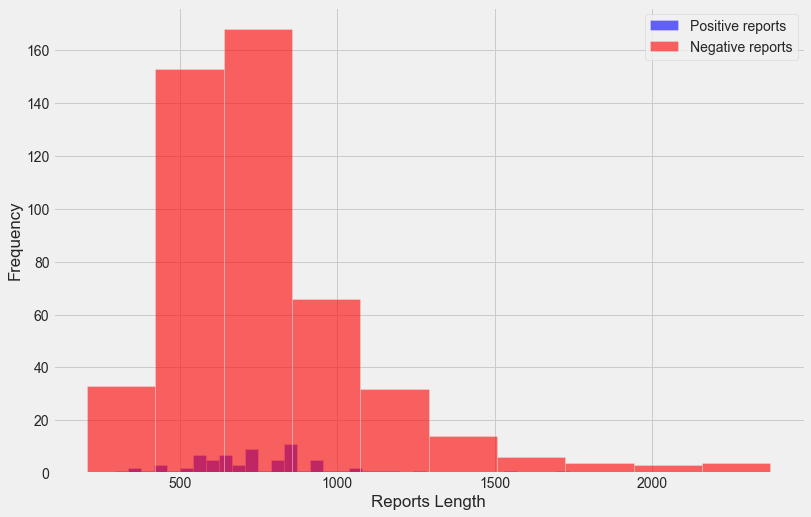

In [51]:
plt.figure(figsize=(12, 8))

df[df.label=='positive'].report_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Positive reports', alpha=0.6)
df[df.label=='negative'].report_len.plot(kind='hist', color='red', 
                                       label='Negative reports', alpha=0.6)
plt.legend()
plt.xlabel("Reports Length")

In [29]:
from collections import Counter

words = df[df.label=='positive'].preprocessed.apply(lambda x: [word.lower() for word in x.split()])
positive_words = Counter()

for msg in words:
    positive_words.update(msg)
    
print(positive_words.most_common(50))

[('.', 377), ('direit', 99), ('esquerd', 79), ('cerebr', 66), ('norm', 63), ('ventricul', 56), ('med', 55), ('sulc', 51), ('cm', 46), ('x', 36), ('0', 35), ('adjac', 34), ('cerebel', 31), ('aspect', 30), ('front', 29), ('parenqu', 29), ('are', 29), ('later', 28), ('pariet', 28), ('compati', 28), ('cistern', 27), ('art', 27), ('efeit', 26), ('regia', 25), ('tempor', 25), ('associ', 25), ('tronc', 25), ('morfolog', 25), ('lob', 24), ('dimenso', 22), ('centr', 22), ('3', 22), ('aument', 21), ('apag', 21), ('expans', 21), ('hipoatenu', 20), ('espess', 20), ('determin', 20), ('1', 20), ('imag', 20), ('discret', 19), ('5', 19), ('calibr', 19), ('inferi', 19), ('desvi', 18), ('atenuaca', 18), ('foc', 17), ('conserv', 17), ('ate', 17), ('encefal', 17)]


In [30]:
from collections import Counter

words = df[df.label=='negative'].preprocessed.apply(lambda x: [word.lower() for word in x.split()])
negative_words = Counter()

for msg in words:
    negative_words.update(msg)
    
print(negative_words.most_common(50))

[('.', 3039), ('norm', 488), ('direit', 349), ('med', 306), ('esquerd', 296), ('cm', 287), ('aspect', 259), ('nao', 240), ('dimenso', 235), ('0', 225), ('preserv', 222), ('atenuaca', 217), ('calibr', 187), ('morfolog', 184), ('estrut', 180), ('cerebr', 177), ('parenqu', 169), ('sinal', 163), ('espess', 159), ('ventricul', 159), ('reduca', 156), ('lob', 155), ('alteraco', 152), ('1', 151), ('exam', 151), ('contorn', 148), ('conserv', 139), ('x', 137), ('art', 137), ('ausenc', 132), ('pulmon', 130), ('signific', 127), ('nodul', 125), ('ha', 123), ('posteri', 123), ('vertebr', 118), ('bilater', 116), ('sulc', 114), ('anteri', 113), ('osse', 111), ('discret', 108), ('centr', 105), ('pequen', 104), ('topic', 104), ('coefici', 103), ('estud', 99), ('ate', 97), ('superi', 97), ('aument', 96), ('inferi', 95)]


In [52]:
X = df.preprocessed
y = df.label_num
print(X.shape)
print(y.shape)

(557,)
(557,)


### Split de dataset

In [54]:
# split X and y em treino e teste  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(417,)
(140,)
(417,)
(140,)


### Vetorização

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# instanciar o vectorizador
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [56]:
# Aprender  o vocabulario de dados do texto, então usá-lo para criar uma matrix 

X_train_dtm = vect.transform(X_train)


In [57]:
X_train_dtm = vect.fit_transform(X_train)

In [58]:
# examinar a matrix
X_train_dtm

<417x2050 sparse matrix of type '<class 'numpy.int64'>'
	with 17716 stored elements in Compressed Sparse Row format>

In [59]:
print(X_train_dtm)

  (0, 747)	1
  (0, 1497)	1
  (0, 413)	1
  (0, 392)	4
  (0, 499)	1
  (0, 2018)	2
  (0, 1162)	1
  (0, 1799)	1
  (0, 1313)	1
  (0, 1812)	1
  (0, 651)	1
  (0, 1353)	5
  (0, 1907)	1
  (0, 1638)	1
  (0, 213)	2
  (0, 1470)	2
  (0, 391)	1
  (0, 1966)	1
  (0, 1998)	1
  (0, 226)	1
  (0, 603)	1
  (0, 1458)	1
  (0, 1854)	1
  (1, 499)	1
  (1, 1313)	1
  :	:
  (415, 219)	1
  (415, 211)	1
  (415, 418)	1
  (415, 172)	1
  (415, 447)	1
  (415, 479)	1
  (415, 1007)	1
  (415, 381)	1
  (415, 382)	1
  (415, 512)	1
  (415, 1842)	1
  (415, 1913)	1
  (416, 452)	1
  (416, 796)	2
  (416, 632)	1
  (416, 1201)	1
  (416, 1039)	1
  (416, 764)	2
  (416, 790)	1
  (416, 198)	1
  (416, 1767)	1
  (416, 828)	1
  (416, 709)	1
  (416, 1084)	1
  (416, 451)	1


In [38]:
X_test_dtm = vect.transform(X_test)
print(X_test_dtm)

  (0, 125)	2
  (0, 213)	2
  (0, 223)	1
  (0, 247)	1
  (0, 277)	1
  (0, 378)	2
  (0, 384)	1
  (0, 422)	1
  (0, 462)	1
  (0, 499)	2
  (0, 511)	1
  (0, 534)	1
  (0, 625)	2
  (0, 656)	3
  (0, 742)	1
  (0, 763)	1
  (0, 786)	1
  (0, 880)	1
  (0, 882)	2
  (0, 885)	1
  (0, 930)	1
  (0, 1229)	1
  (0, 1253)	1
  (0, 1310)	1
  (0, 1321)	2
  :	:
  (139, 632)	1
  (139, 667)	1
  (139, 695)	1
  (139, 718)	1
  (139, 779)	1
  (139, 780)	1
  (139, 796)	1
  (139, 822)	1
  (139, 882)	1
  (139, 1023)	1
  (139, 1241)	1
  (139, 1325)	1
  (139, 1358)	1
  (139, 1411)	1
  (139, 1516)	3
  (139, 1519)	2
  (139, 1575)	1
  (139, 1584)	1
  (139, 1670)	2
  (139, 1785)	1
  (139, 1803)	1
  (139, 1834)	1
  (139, 1894)	1
  (139, 1907)	1
  (139, 2041)	1


### Treinamento

In [39]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# tfidf_transformer.fit(X_train_dtm)
# tfidf_transformer.transform(X_train_dtm)

Construindo e avaliando o modelo Naive Bayes multinomial:

O classificador multinomial Naive Bayes é adequado para classificação com características discretas (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de recursos inteiros. No entanto, na prática, contagens fracionárias como tf-idf também podem funcionar.

In [60]:
# importar o modelo Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [61]:
# treinar o modelo usando X_train_dtm (temporizar com um IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 3.3 ms, sys: 1.57 ms, total: 4.87 ms
Wall time: 3.69 ms


MultinomialNB()

In [62]:
# Fazer predições para X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [63]:
# Calcular acurácia
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8642857142857143

In [64]:
# # visualizar matrix de confusão
metrics.confusion_matrix(y_test, y_pred_class)

array([[108,  11],
       [  8,  13]])

In [65]:
X_test.shape


(140,)

In [66]:
# visualizar texto dos falsos positivos
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

221     nao ha sinal hemorrag process expans intracra...
378     calot crani sinal craniotom front direit . es...
349     presenc mater fixaca extern . frat cominu pla...
499     mass sol heterogene limit mal defin aspect in...
370     calot crani perd aeraca mastoid esquerd . esp...
441     are encefalomalace pol tempor gir tempor infe...
250     frat nao desalinh oss front esquerd extensa a...
249     nao ha evidenc process expans intraparenquima...
295     imag compati aneurism sacul topograf art comu...
159     hipoatenuaca cor subcortic occipit esquerd ef...
373     encefalomalac front esquerd determin alarg su...
Name: preprocessed, dtype: object

In [67]:
# visualizar texto dos falsos negativos
X_test[y_pred_class < y_test]

47     aparent falh ench art segment basal later lob...
41     sinal tromboembol pulmon segment subsegment l...
0      aument part mol regio per orbit mai direit . ...
62     frat cominu terc arc cost esquerd destac desv...
31     imag quart ventricul form contorn dimenso nor...
3      exam realiz . lev aument volumetr part mol di...
19     laud compar exam anteri dia evidenc not discr...
16     apend cecal calibr aument 1 9 cm pared espess...
Name: preprocessed, dtype: object

In [48]:
# Exemplo de falso negativo
X_test[31]

' imag quart ventricul form contorn dimenso norm . tronc cerebr cerebel form contorn sinal norm . aument coleca extr axial subd atual exam compromet tod extensa hemisferi esquerd inclu regia occipit coefici atenuaca semelh liqu . ha aument efeit expans caracter mai compressa sulc cortic adjac .'

In [49]:
# Calcular probabilidades preditas para X_test_dtm 
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([1.37951858e-16, 1.06667141e-03, 9.39483562e-01, 2.22432968e-03,
       7.24033582e-15, 1.27098321e-01, 9.77627192e-01, 9.10600657e-11,
       1.00000000e+00, 7.55546180e-01, 3.36189221e-09, 4.41600861e-04,
       3.45705221e-20, 1.06667141e-03, 2.35237360e-10, 2.16545451e-01,
       6.23984803e-05, 2.43234339e-03, 1.27098321e-01, 9.21500499e-04,
       4.93436742e-08, 2.21151697e-07, 2.49690074e-01, 1.27098321e-01,
       6.67066962e-01, 1.00000000e+00, 6.67601704e-02, 1.71403905e-03,
       7.47422308e-07, 1.31172527e-02, 1.17213883e-03, 2.95506202e-17,
       9.99776464e-01, 1.73392342e-16, 3.65381363e-01, 9.99987273e-01,
       2.73036456e-11, 1.37426737e-12, 3.46404859e-07, 2.04118379e-02,
       2.66600465e-01, 1.88333085e-06, 1.93132444e-10, 8.21003702e-03,
       8.76147809e-15, 8.11092962e-05, 5.28773266e-10, 8.62666573e-01,
       1.25431843e-06, 1.65168613e-08, 6.29334380e-02, 7.49143293e-05,
       8.53896678e-04, 1.90443770e-61, 1.31172527e-02, 9.99922481e-01,
      

In [68]:
# Calcular AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.7995198079231693